In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import datetime

CSV_FILE = "expenses.csv"

def load_expenses():
    try:
        return pd.read_csv(CSV_FILE)
    except FileNotFoundError:
        return pd.DataFrame(columns=["Date", "Category", "Amount", "Description"])

def save_expense(entry):
    df = load_expenses()
    df = pd.concat([df, pd.DataFrame([entry])], ignore_index=True)
    df.to_csv(CSV_FILE, index=False)


In [4]:
# Input widgets
date_widget = widgets.DatePicker(description="Date", value=datetime.date.today())
category_widget = widgets.Dropdown(options=["Food", "Transport", "Entertainment", "Bills", "Shopping", "Other"], description="Category")
amount_widget = widgets.FloatText(description="Amount")
desc_widget = widgets.Text(description="Description", placeholder='Optional')

add_button = widgets.Button(description="Add Expense", button_style='success')
output = widgets.Output()

def on_add_clicked(b):
    entry = {
        "Date": date_widget.value.strftime('%Y-%m-%d'),
        "Category": category_widget.value,
        "Amount": amount_widget.value,
        "Description": desc_widget.value
    }
    save_expense(entry)
    with output:
        clear_output()
        print("✅ Expense added successfully!")

add_button.on_click(on_add_clicked)

display(widgets.VBox([date_widget, category_widget, amount_widget, desc_widget, add_button, output]))


In [5]:
df = load_expenses()
if not df.empty:
    display(df.sort_values("Date", ascending=False).reset_index(drop=True))
else:
    print("No expenses recorded yet.")


,Date,Category,Amount,Description
0,2025-06-27,Other,3750.0,Rent
1,2024-06-10,Food,120.0,Dinner
2,2024-06-07,Shopping,500.0,Clothes
3,2024-06-05,Bills,300.0,Electricity
4,2024-06-03,Entertainment,200.0,Netflix
5,2024-06-02,Transport,50.0,Cab
6,2024-06-01,Food,150.0,Lunch


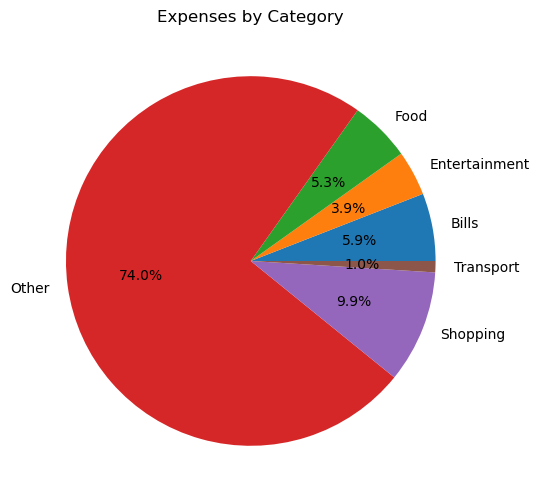

In [6]:
df = load_expenses()
if not df.empty:
    df["Amount"] = pd.to_numeric(df["Amount"])
    summary = df.groupby("Category")["Amount"].sum()
    summary.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title="Expenses by Category")
    plt.ylabel("")
    plt.show()
else:
    print("No data to visualize.")


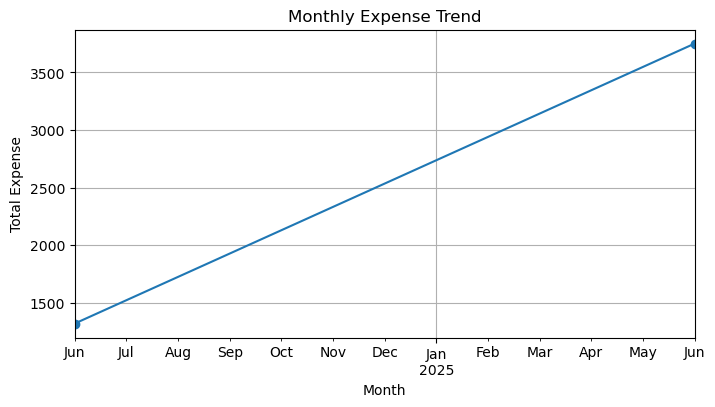

In [7]:
df = load_expenses()
if not df.empty:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.to_period("M")
    trend = df.groupby("Month")["Amount"].sum()
    trend.plot(marker='o', title="Monthly Expense Trend", figsize=(8, 4))
    plt.xlabel("Month")
    plt.ylabel("Total Expense")
    plt.grid(True)
    plt.show()
else:
    print("No data for trend chart.")


In [8]:
from datetime import datetime as dt

# Load updated data
df = load_expenses()

# Widgets for filtering
category_filter = widgets.SelectMultiple(
    options=sorted(df["Category"].unique()),
    value=tuple(sorted(df["Category"].unique())),
    description="Category",
    layout={'height': '100px'}
)

min_date = pd.to_datetime(df["Date"]).min() if not df.empty else pd.to_datetime("2023-01-01")
max_date = pd.to_datetime(df["Date"]).max() if not df.empty else pd.to_datetime("today")

date_range = widgets.SelectionRangeSlider(
    options=[d.strftime('%Y-%m-%d') for d in pd.date_range(min_date, max_date)],
    index=(0, len(pd.date_range(min_date, max_date)) - 1),
    description='Date Range',
    layout={'width': '80%'}
)

refresh_btn = widgets.Button(description="🔄 Refresh Dashboard", button_style='info')

dashboard_output = widgets.Output()

def filter_and_plot(_):
    with dashboard_output:
        clear_output()

        df_filtered = df.copy()

        # Apply filters
        df_filtered["Date"] = pd.to_datetime(df_filtered["Date"])
        start_date = pd.to_datetime(date_range.value[0])
        end_date = pd.to_datetime(date_range.value[1])
        df_filtered = df_filtered[
            (df_filtered["Category"].isin(category_filter.value)) &
            (df_filtered["Date"] >= start_date) &
            (df_filtered["Date"] <= end_date)
        ]

        # Show table
        if not df_filtered.empty:
            display(df_filtered.sort_values("Date", ascending=False).reset_index(drop=True))

            # Pie Chart
            summary = df_filtered.groupby("Category")["Amount"].sum()
            summary.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), title="Filtered Expenses by Category")
            plt.ylabel("")
            plt.show()

            # Line Chart
            df_filtered["Month"] = df_filtered["Date"].dt.to_period("M")
            trend = df_filtered.groupby("Month")["Amount"].sum()
            trend.plot(marker='o', figsize=(7, 4), title="Filtered Monthly Expense Trend")
            plt.grid(True)
            plt.xlabel("Month")
            plt.ylabel("Total Expense")
            plt.show()
        else:
            print("No data available for selected filters.")

refresh_btn.on_click(filter_and_plot)

# Display filters and dashboard
display(widgets.VBox([category_filter, date_range, refresh_btn, dashboard_output]))

# Show dashboard initially
filter_and_plot(None)
